# Analisis dan Prediksi Kepuasan Hotel
---


**Kelompok 3**

**> Anggota:**
 * Wildan Mufid Ramadhan - 205150201111002
 * Reyhan Ardiya Yogastama - 205150200111025
 * Muhamad Fauzan Wahyudi - 205150200111037

# Latar Belakang

#### Rumusan Masalah

[Analisis]
1. Melakukan perbandingan  algoritma Decision Tree dan K-Nearest Neighbor pada kasus berikut
2. Menentukan metode yang terbaik diantara tanpa resampling, undersamplig, dan oversampling pada kasus berikut

[Prediksi]
1. Memprediksi apa yang harus diprioritaskan ke depannya agar tamu hotel puas
 


# Metadata

purposeoftravel - aviation, academic, personal, business, tourism.

Type of Travel - Group travel, Personal Travel.

Type Of Booking - Group bookings, Individual/Couple.

Hotel wifi service - Ratings out of 5.

Departure/Arrival convenience - Ratings out of 5.

Ease of Online booking - Ratings out of 5.

Hotel location - Ratings out of 5.

Food and drink - Ratings out of 5.

Stay comfort - Ratings out of 5.

Common Room entertainment - Ratings out of 5.

Checkin/Checkout service - Ratings out of 5.

Other service - Ratings out of 5.

Cleanliness - Ratings out of 5.

satisfaction - satisfied, neutral or dissatisfied.

# Import dan Upload

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sns.set_theme(style="whitegrid",palette='bright',rc={'axes.edgecolor':'black'})

In [ ]:
from google.colab import files
kontak = files.upload()
for fn in kontak.keys():
  print('Nama file "{name}" dengan panjang {length} bytes'.format(name=fn, length=len(kontak[fn])))

Saving Hotel Satisfaction Score.csv to Hotel Satisfaction Score.csv
Nama file "Hotel Satisfaction Score.csv" dengan panjang 9645753 bytes


# Read Data Frame

* Baca Data

In [ ]:
df = pd.read_csv('Hotel Satisfaction Score.csv')
df.head()

,id,Gender,Age,purpose_of_travel,Type of Travel,Type Of Booking,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness,satisfaction
0,70172,Male,13,aviation,Personal Travel,Not defined,3,4,3,1,5,5,5,4,5,5,neutral or dissatisfied
1,5047,Male,25,tourism,Group Travel,Group bookings,3,2,3,3,1,1,1,1,4,1,neutral or dissatisfied
2,110028,Female,26,tourism,Group Travel,Group bookings,2,2,2,2,5,5,5,4,4,5,satisfied
3,24026,Female,25,tourism,Group Travel,Group bookings,2,5,5,5,2,2,2,1,4,2,neutral or dissatisfied
4,119299,Male,61,aviation,Group Travel,Group bookings,3,3,3,3,4,5,3,3,3,3,satisfied


* Informasi Data Frame

In [ ]:
print('Kolom: {}'.format(df.shape[1]))
print('Baris: {}'.format(df.shape[0]))

Kolom: 17
Baris: 103904


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   id                              103904 non-null  int64 
 1   Gender                          103904 non-null  object
 2   Age                             103904 non-null  int64 
 3   purpose_of_travel               103904 non-null  object
 4   Type of Travel                  103904 non-null  object
 5   Type Of Booking                 103904 non-null  object
 6   Hotel wifi service              103904 non-null  int64 
 7   Departure/Arrival  convenience  103904 non-null  int64 
 8   Ease of Online booking          103904 non-null  int64 
 9   Hotel location                  103904 non-null  int64 
 10  Food and drink                  103904 non-null  int64 
 11  Stay comfort                    103904 non-null  int64 
 12  Common Room entertainment     

In [ ]:
df.describe(include=['O'])

,Gender,purpose_of_travel,Type of Travel,Type Of Booking,satisfaction
count,103904,103904,103904,103904,103904
unique,2,5,2,3,2
top,Female,tourism,Group Travel,Group bookings,neutral or dissatisfied
freq,52727,32053,71655,49665,58879


# EDA


#### Jumlah kepuasan pengguna hotel

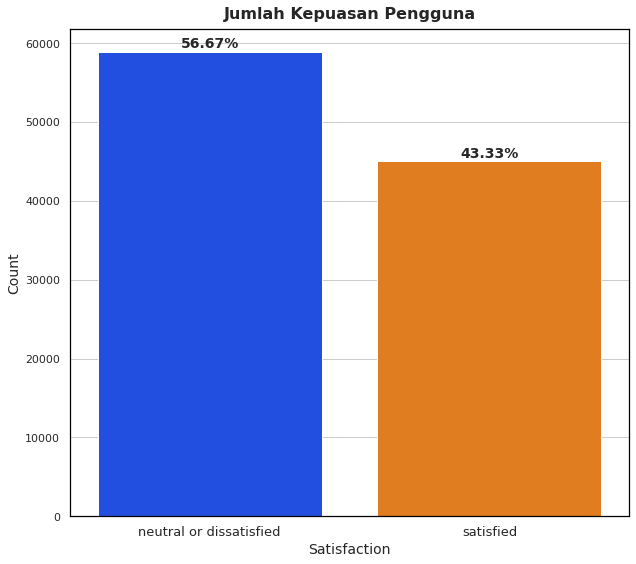

In [ ]:
fig, ax = plt.subplots(1,figsize=(9,8))
sns.countplot(ax=ax, x = df['satisfaction'])

ax.set_title('Jumlah Kepuasan Pengguna',pad = 10, fontsize=16,fontweight='semibold')
ax.set_xlabel('Satisfaction',fontsize=14)
ax.set_ylabel('Count',fontsize=14)
ax.set_xticklabels(df['satisfaction'].unique(),fontsize=13)
for i, value in enumerate(df['satisfaction'].value_counts(sort=False)):
    ax.text(i,value*1.01,'%.2f%%'%float(value/df.shape[0]*100),fontsize=14,weight='semibold',ha='center')

fig.tight_layout()
plt.show()

Grafik jumlah kepuasan pengguna hotel menunjukkan data *less imbalance* dengan "neutral or dissatisfied" sebesar 56.67% dan "satisfied" sebesar 43.33%, jadi akan dilakukan 3 percobaan untuk mencari model yang terbaik diantaranya data tanpa resampling, oversampling, dan undersampling.

#### Distribusi data pada kolom kategorikal

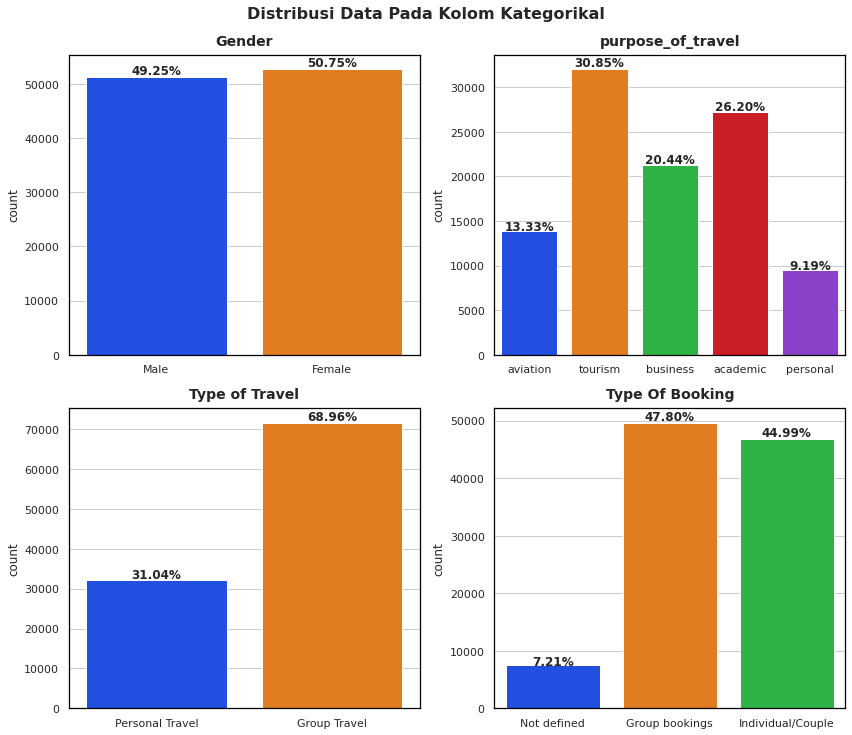

In [ ]:
fig, ax = plt.subplots(2,2,figsize=(12,10))
fig.suptitle('Distribusi Data Pada Kolom Kategorikal',fontsize=16,weight='bold',y=1.02)

ax[0,0].set_title('Gender',fontsize=14,weight='bold',pad=10)
sns.countplot(ax=ax[0,0],x=df['Gender'])
ax[0,0].set_xlabel(None)
for i, value in enumerate(df['Gender'].value_counts(sort=False)):
    ax[0,0].text(i,value*1.01,'%.2f%%'%float(value/df.shape[0]*100),fontsize=12,weight='semibold',ha='center')

ax[0,1].set_title('purpose_of_travel',fontsize=14,weight='bold',pad=10)
sns.countplot(ax=ax[0,1],x=df['purpose_of_travel'])
ax[0,1].set_xlabel(None)
for i, value in enumerate(df['purpose_of_travel'].value_counts(sort=False)):
    ax[0,1].text(i,value*1.01,'%.2f%%'%float(value/df.shape[0]*100),fontsize=12,weight='semibold',ha='center')

ax[1,0].set_title('Type of Travel',fontsize=14,weight='bold',pad=10)
sns.countplot(ax=ax[1,0],x=df['Type of Travel'])
ax[1,0].set_xlabel(None)
for i, value in enumerate(df['Type of Travel'].value_counts(sort=False)):
    ax[1,0].text(i,value*1.01,'%.2f%%'%float(value/df.shape[0]*100),fontsize=12,weight='semibold',ha='center')

ax[1,1].set_title('Type Of Booking',fontsize=14,weight='bold',pad=10)
sns.countplot(ax=ax[1,1],x=df['Type Of Booking'])
ax[1,1].set_xlabel(None)
for i, value in enumerate(df['Type Of Booking'].value_counts(sort=False)):
    ax[1,1].text(i,value*1.01,'%.2f%%'%float(value/df.shape[0]*100),fontsize=12,weight='semibold',ha='center')

fig.tight_layout()
plt.show()

Grafik distribusi data ketegorikal pada kolom 'Gender' menunjukan data hampir balance, lalu kolom 'Type of Booking' pada grafik "Group bookings" dan "Individual" menunjukan data balance sedangkan grafik "Not defined" hanya terdapat sedikit data, untuk kolom lainnya adalah data imbalance.

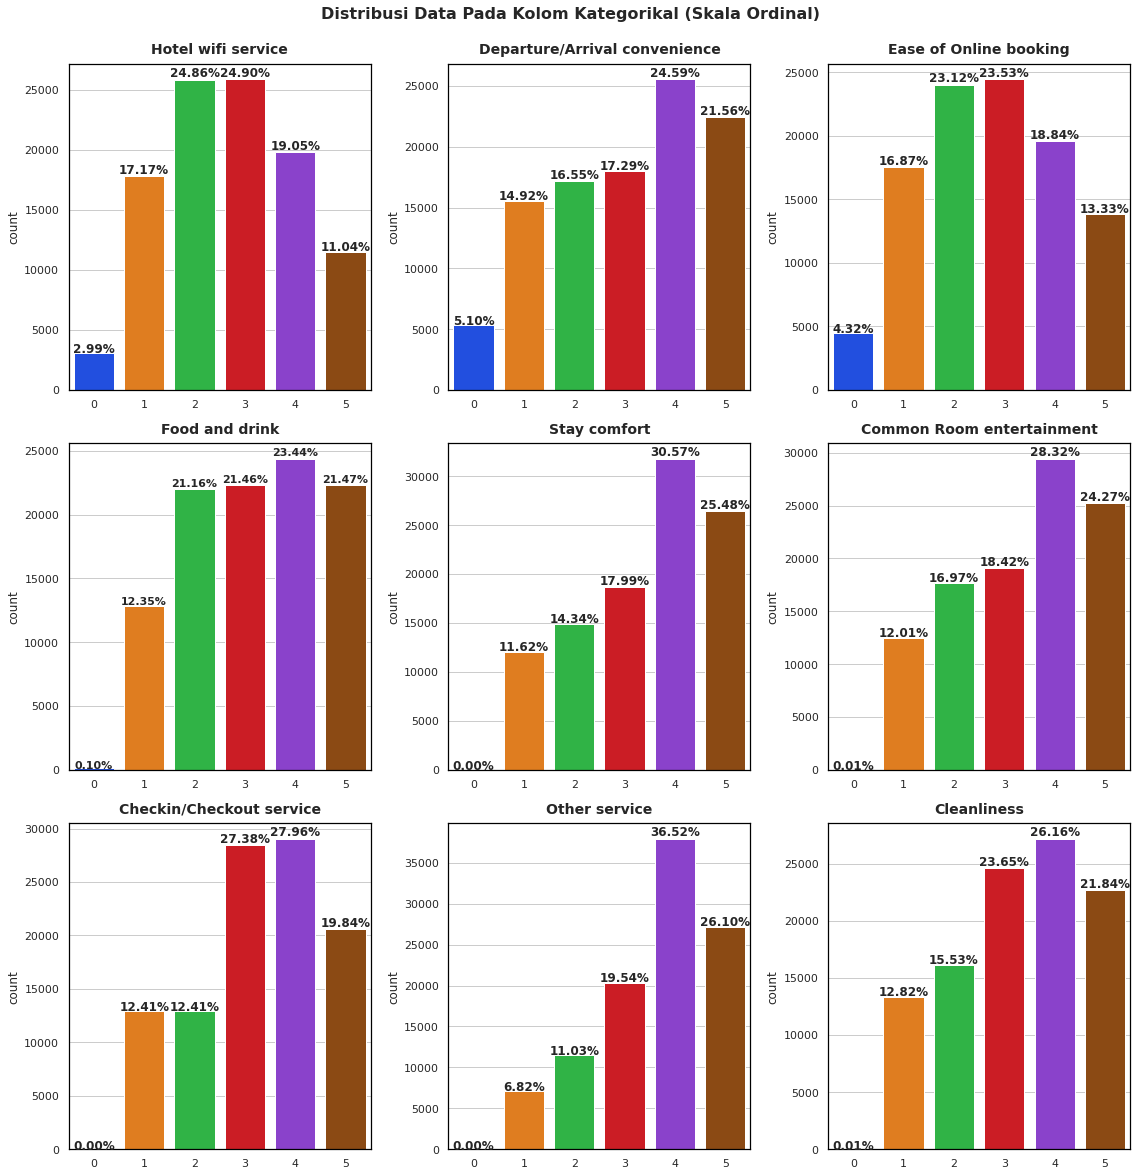

In [ ]:
fig, ax = plt.subplots(3,3,figsize=(16,16))
fig.suptitle('Distribusi Data Pada Kolom Kategorikal (Skala Ordinal)',fontsize=16,weight='bold',y=1.02)

ax[0,0].set_title('Hotel wifi service',fontsize=14,weight='bold',pad=10)
sns.countplot(ax=ax[0,0],x=df['Hotel wifi service'])
ax[0,0].set_xlabel(None)
for i, value in enumerate(df['Hotel wifi service'].value_counts(sort=False).sort_index()):
    ax[0,0].text(i,value*1.01,'%.2f%%'%float(value/df.shape[0]*100),fontsize=12,weight='semibold',ha='center')

ax[0,1].set_title('Departure/Arrival convenience',fontsize=14,weight='bold',pad=10)
sns.countplot(ax=ax[0,1],x=df['Departure/Arrival  convenience'])
ax[0,1].set_xlabel(None)
for i, value in enumerate(df['Departure/Arrival  convenience'].value_counts(sort=False).sort_index()):
    ax[0,1].text(i,value*1.01,'%.2f%%'%float(value/df.shape[0]*100),fontsize=12,weight='semibold',ha='center')

ax[0,2].set_title('Ease of Online booking',fontsize=14,weight='bold',pad=10)
sns.countplot(ax=ax[0,2],x=df['Ease of Online booking'])
ax[0,2].set_xlabel(None)
for i, value in enumerate(df['Ease of Online booking'].value_counts(sort=False).sort_index()):
    ax[0,2].text(i,value*1.01,'%.2f%%'%float(value/df.shape[0]*100),fontsize=12,weight='semibold',ha='center')

ax[1,0].set_title('Food and drink',fontsize=14,weight='bold',pad=10)
sns.countplot(ax=ax[1,0],x=df['Food and drink'])
ax[1,0].set_xlabel(None)
for i, value in enumerate(df['Food and drink'].value_counts(sort=False).sort_index()):
    ax[1,0].text(i,value*1.01,'%.2f%%'%float(value/df.shape[0]*100),fontsize=11,weight='semibold',ha='center')

ax[1,1].set_title('Stay comfort',fontsize=14,weight='bold',pad=10)
sns.countplot(ax=ax[1,1],x=df['Stay comfort'])
ax[1,1].set_xlabel(None)
for i, value in enumerate(df['Stay comfort'].value_counts(sort=False).sort_index()):
    ax[1,1].text(i,value*1.01,'%.2f%%'%float(value/df.shape[0]*100),fontsize=12,weight='semibold',ha='center')

ax[1,2].set_title('Common Room entertainment',fontsize=14,weight='bold',pad=10)
sns.countplot(ax=ax[1,2],x=df['Common Room entertainment'])
ax[1,2].set_xlabel(None)
for i, value in enumerate(df['Common Room entertainment'].value_counts(sort=False).sort_index()):
    ax[1,2].text(i,value*1.01,'%.2f%%'%float(value/df.shape[0]*100),fontsize=12,weight='semibold',ha='center')

ax[2,0].set_title('Checkin/Checkout service',fontsize=14,weight='bold',pad=10)
sns.countplot(ax=ax[2,0],x=df['Checkin/Checkout service'])
ax[2,0].set_xlabel(None)
for i, value in enumerate(df['Checkin/Checkout service'].value_counts(sort=False).sort_index()):
    ax[2,0].text(i,value*1.01,'%.2f%%'%float(value/df.shape[0]*100),fontsize=12,weight='semibold',ha='center')

ax[2,1].set_title('Other service',fontsize=14,weight='bold',pad=10)
sns.countplot(ax=ax[2,1],x=df['Other service'])
ax[2,1].set_xlabel(None)
for i, value in enumerate(df['Other service'].value_counts(sort=False).sort_index()):
    ax[2,1].text(i,value*1.01,'%.2f%%'%float(value/df.shape[0]*100),fontsize=12,weight='semibold',ha='center')

ax[2,2].set_title('Cleanliness',fontsize=14,weight='bold',pad=10)
sns.countplot(ax=ax[2,2],x=df['Cleanliness'])
ax[2,2].set_xlabel(None)
for i, value in enumerate(df['Cleanliness'].value_counts(sort=False).sort_index()):
    ax[2,2].text(i,value*1.01,'%.2f%%'%float(value/df.shape[0]*100),fontsize=12,weight='semibold',ha='center')

fig.tight_layout()
plt.show()

Grafik distribusi data ketegorikal dalam bentuk skala ordinal mayoritas orang memberikan nilai 4 pada kolom 'Departure/Arrival convenience'; 'Stay comfort'; 'Common Room Entertainment'; dan 'Other service', untuk nilai hampir balance 2 dan 3 pada kolom 'Hotel wifi service' dan 'Ease of Online booking', untuk nilai hampir balance 3 dan 4 pada kolom 'Checkin/Checkout service' dan 'Cleanliness', dan untuk nilai yang hampir balance 2 hingga 5 pada kolom 'Food and drink'.

#### Distribusi data kolom numerik

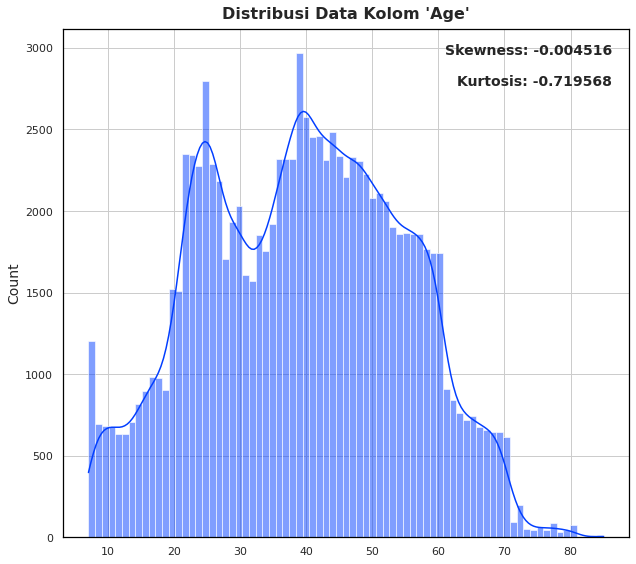

In [ ]:
fig, ax = plt.subplots(1,figsize=(9,8))
sns.histplot(ax=ax, x=df['Age'],kde=True)

ax.set_title('Distribusi Data Kolom \'Age\'',pad = 10, fontsize=16,fontweight='semibold')
ax.set_xlabel(None)
ax.set_ylabel('Count',fontsize=14)
ax.text(x=0.97, y=0.97, transform=ax.transAxes, s="Skewness: %f" % df['Age'].skew(),fontweight='demibold', fontsize=14, verticalalignment='top',horizontalalignment='right')
ax.text(x=0.97, y=0.91, transform=ax.transAxes, s="Kurtosis: %f" % df['Age'].kurtosis(),fontweight='demibold', fontsize=14, verticalalignment='top',horizontalalignment='right')

fig.tight_layout()
plt.show()

Uji Normalitas

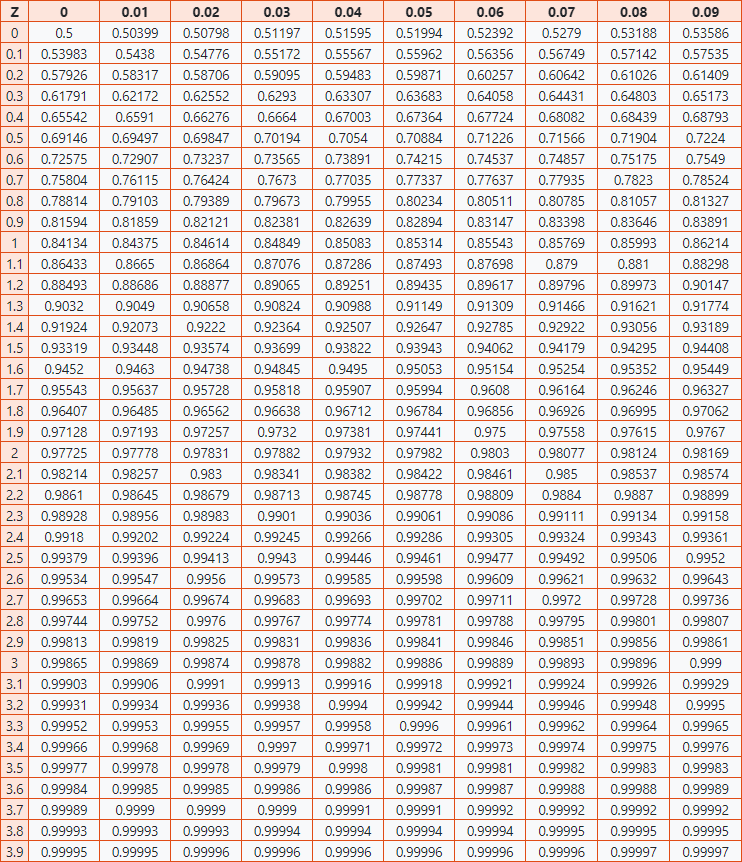

Untuk menguji normalitas distribusi data, dapat menggunakan perbandingan *z critical value* atau nilai krits z dihitung menggunakan Z(α/2). Kami uji menggunakan α atau probabilitas 5%, jadi Z(2,5%) atau Z(0,025). Untuk mencari nilai Z(0,025) menggunakan probabilitas 0,975 yang didapatkan dari 1 - 0,025. Berdasarkan tabel z nilai kritis z  dengan probabilitas 0,975 adalah 1,96. Jadi jika dibandingkan nilai skewness dengan nilai kritis z didapatkan bahwa nilai skewness (-0,0045) lebih kecil dari nilai kritis z (1,96), maka distribusi data tersebut adalah normal atau balance atau simetris.

Nilai kurtosis menunjukan -0,7 puncak tumpul, yang artinya bahwa data terdistribusi dengan merata atau balance, tidak ada data ekstrim (outlier). Untuk membuktikan bahwa tidak ada data ekstrim dapat dilihat pada grafik box plot berikut.

In [ ]:
px.box(df, x=['Age'])

Grafik menunjukan bahwa dikolom numerik 'Age' tidak ada yang 1,5 lebih besar dari kuarti 3, maka data pada kolom 'Age' tidak data ekstrim (outlier).

#### Perbandingan kepuasan pengguna hotel berdasarkan umur

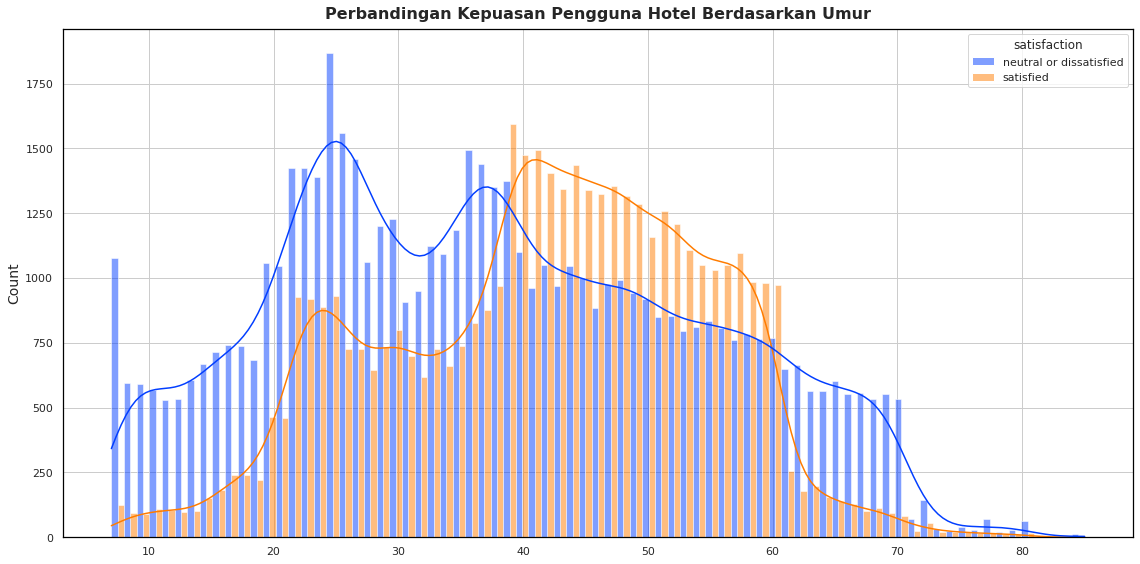

In [ ]:
fig, ax = plt.subplots(1,figsize=(16,8))
sns.histplot(data=df,x='Age',kde=True,hue='satisfaction',multiple='dodge')

ax.set_title('Perbandingan Kepuasan Pengguna Hotel Berdasarkan Umur',pad = 10, fontsize=16,fontweight='semibold')
ax.set_xlabel(None)
ax.set_ylabel('Count',fontsize=14)

fig.tight_layout()
plt.show()

Grafik menunjukan rata-rata pengguna hotel yang puas pada rentan umur 40 hingga 60.

#### Korelasi masing-masing fitur terhadap kepuasan pelanggan

In [ ]:
tempDf = df.copy()
tempDf['satisfaction'] = tempDf['satisfaction'].map({'neutral or dissatisfied':0,'satisfied':1})
corr = tempDf.corr()['satisfaction'].sort_values(ascending=False)[1:]

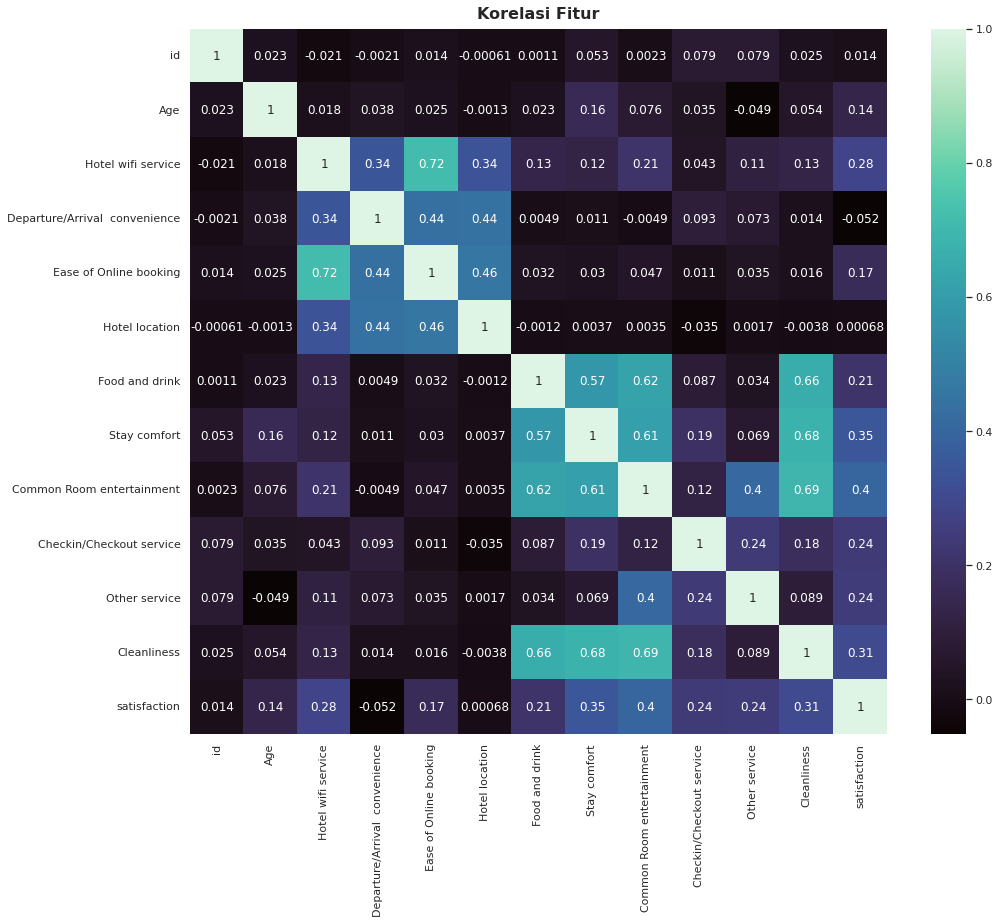

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(15,13))
sns.heatmap(ax=ax, data=tempDf.corr(), annot=True, cmap='mako')

ax.set_title('Korelasi Fitur',pad = 10, fontsize=16,fontweight='semibold')

fig.tight_layout()
plt.show()

Grafik heatmap menunjukkan fitur yang berhubungan kuat dengan 'satisfaction' adalah 'Common Room entertainment' dengan nilai korelasi sebesar 0,4. Terdapat fitur yang berbanding terbalik dengan 'satisfaction' yaitu 'Departure/Arrival convenience' dengan nilai korelasi -0,052. Fitur yang tidak ada hubungannya dengan 'satisfaction' diantaranya 'id' dan 'Hotel location' dengan nilai korelasi yang mendekati 0, maka dari itu kedua fitur tersebut tidak dipakai dalam proses pembuatan model nantinya.

# Pre-Processing

In [ ]:
cleanDF = df.copy()

* Kolom yang tidak berkorelasi dengan kolom 'satisfaction'

In [ ]:
tempDf = df.copy()
tempDf['satisfaction'] = tempDf['satisfaction'].map({'neutral or dissatisfied':0,'satisfied':1})
corr = tempDf.corr()['satisfaction'].sort_values(ascending=False)[1:]

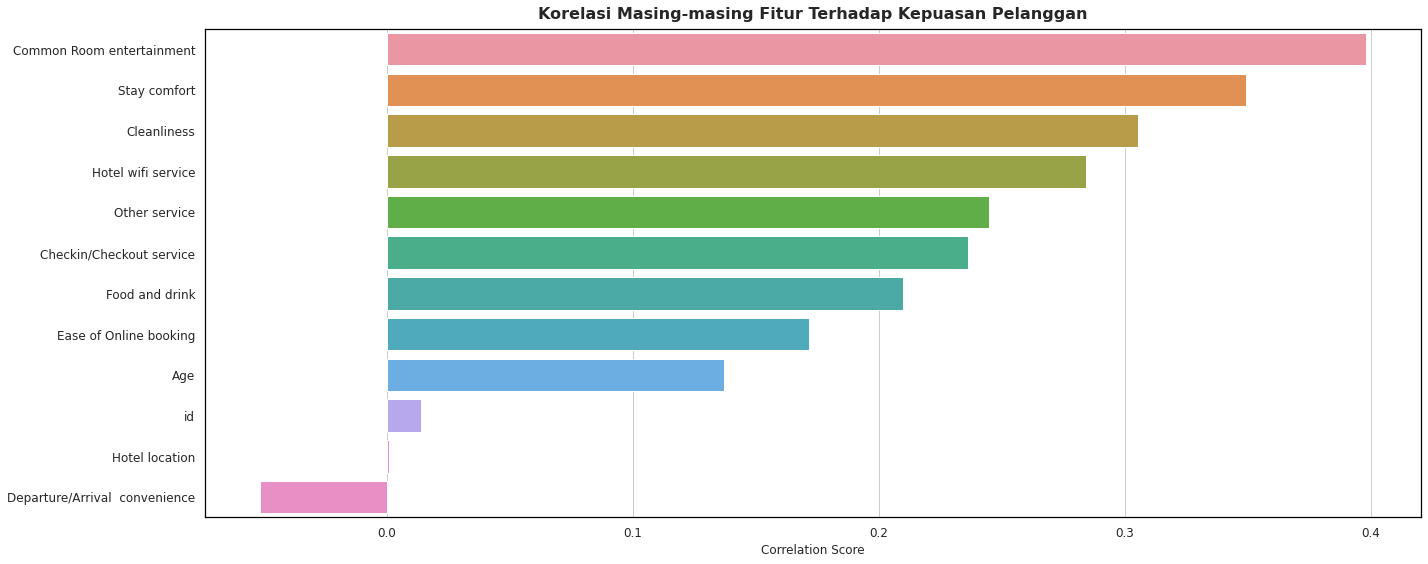

In [ ]:
fig,ax = plt.subplots(1,figsize=(20,8))
sns.barplot(ax=ax,y=corr.index,x=corr.values)

ax.set_title('Korelasi Masing-masing Fitur Terhadap Kepuasan Pelanggan',pad = 10, fontsize=16,fontweight='semibold')
ax.set_xlabel('Correlation Score',fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

fig.tight_layout()
plt.show()

Berdasarkan grafik heatmap sebelumnya dan grafik bar menunjukan bahwa fitur 'id' dan 'Hotel location' memiliki nilai korelasi yang mendekati 0 dibandingkan fitur lainnya, jadi kedua kolom tersebut dapat di-*drop*



In [ ]:
cleanDF.drop(['id', 'Hotel location'], axis = 1, inplace=True)

* Duplikasi data

In [ ]:
cleanDF.duplicated().sum()

1959

Terdapat duplikasi data sebanyak 1959 data, jadi 1959 data tersebut akan dihapus

In [ ]:
cleanDF.drop_duplicates(keep=False, inplace=True)

In [ ]:
cleanDF.duplicated().sum()

0

* Missing Values


In [ ]:
cleanDF.isna().sum()

Gender                            0
Age                               0
purpose_of_travel                 0
Type of Travel                    0
Type Of Booking                   0
Hotel wifi service                0
Departure/Arrival  convenience    0
Ease of Online booking            0
Food and drink                    0
Stay comfort                      0
Common Room entertainment         0
Checkin/Checkout service          0
Other service                     0
Cleanliness                       0
satisfaction                      0
dtype: int64

Output menunjukan bahwa tidak ada data yang hilang atau kosong, maka *missing values handler* tidak diperlukan

* Hasil akhir Data Frame setelah pre-processing

In [ ]:
print('Kolom: {}'.format(cleanDF.shape[1]))
print('Baris: {}'.format(cleanDF.shape[0]))

Kolom: 15
Baris: 100118


In [ ]:
cleanDF.describe(include=['O'])

,Gender,purpose_of_travel,Type of Travel,Type Of Booking,satisfaction
count,100118,100118,100118,100118,100118
unique,2,5,2,3,2
top,Female,tourism,Group Travel,Group bookings,neutral or dissatisfied
freq,50975,30517,68471,46946,57511


# Feature Engineering

#### One-Hot Encoding

Dalam dataset masih terdapat kolom kategorikal, maka dari itu diperlukan proses One Hot Encode untuk mengubah kolom kategorikal menjadi kolom numerik. One-Hot Encode adalah proses untuk membuat kolom baru dari variabel kategorikal kita di mana setiap kategori menjadi kolom baru dengan nilai 0 atau 1 (0 mewakili tidak ada dan 1 mewakili ada).

In [ ]:
def make_labelsColumn(data):
    output = list()
    for i in range(len(data)):
        index = data[i]
        for j in range(len(index)):
            if len(index)>2:
                output.append(index[j])
            else :
                output.append(index[1])
                break
    return output

In [ ]:
from sklearn.preprocessing import OneHotEncoder
catDF = cleanDF.select_dtypes(include='object')
classDF = catDF.pop('satisfaction')

encode = OneHotEncoder(sparse=False,drop='if_binary')
catEncoded = pd.DataFrame(encode.fit_transform(catDF), columns=make_labelsColumn(encode.categories_))
catEncoded.head()

,Male,academic,aviation,business,personal,tourism,Personal Travel,Group bookings,Individual/Couple,Not defined
0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
encodedDF = pd.concat([cleanDF.select_dtypes(include='number').reset_index(drop=True),catEncoded.reset_index(drop=True)], axis = 1)
encodedDF.head()

,Age,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness,Male,academic,aviation,business,personal,tourism,Personal Travel,Group bookings,Individual/Couple,Not defined
0,13,3,4,3,5,5,5,4,5,5,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,25,3,2,3,1,1,1,1,4,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,26,2,2,2,5,5,5,4,4,5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,61,3,3,3,4,5,3,3,3,3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,26,3,4,2,1,1,1,4,4,1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


#### Standarisasi

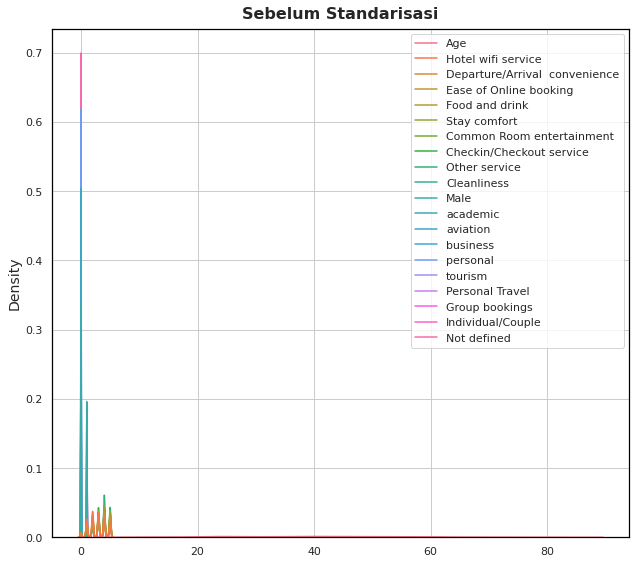

In [ ]:
fig, ax = plt.subplots(1,figsize=(9,8))
sns.kdeplot(ax=ax, data=encodedDF)

ax.set_title('Sebelum Standarisasi',pad = 10, fontsize=16,fontweight='semibold')
ax.set_ylabel('Density',fontsize=14)

fig.tight_layout()
plt.show()

Berdasarkan seluruh grafik kernel density estimation (KDE) data lebih dominan skew ke kiri, maka dari itu standarisasi diperlukan

In [ ]:
from sklearn.preprocessing import RobustScaler
numDF = encodedDF

RscaleDF = RobustScaler().fit_transform(numDF)
RscaleDF = pd.DataFrame(RscaleDF, index = numDF.index, columns = numDF.columns)
RscaleDF.head()

,Age,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness,Male,academic,aviation,business,personal,tourism,Personal Travel,Group bookings,Individual/Couple,Not defined
0,-1.125000,0.0,0.5,0.0,1.0,0.333333,0.5,0.5,0.5,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,-0.625000,0.0,-0.5,0.0,-1.0,-1.000000,-1.5,-1.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,-0.583333,-0.5,-0.5,-0.5,1.0,0.333333,0.5,0.5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.875000,0.0,0.0,0.0,0.5,0.333333,-0.5,0.0,-0.5,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.583333,0.0,0.5,-0.5,-1.0,-1.000000,-1.5,0.5,0.0,-1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


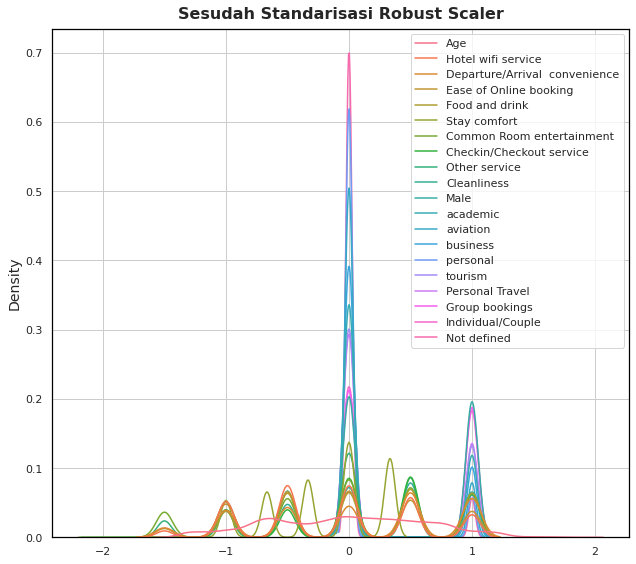

In [ ]:
fig, ax = plt.subplots(1,figsize=(9,8))
sns.kdeplot(ax=ax, data=RscaleDF)

ax.set_title('Sesudah Standarisasi Robust Scaler',pad = 10, fontsize=16,fontweight='semibold')
ax.set_ylabel('Density',fontsize=14)

fig.tight_layout()
plt.show()

Metode standarisasi yang digunakan adalah Robust Scaler, dimana metode ini cocok untuk menangani data yang skew ke kiri dan juga data kategorikal yang sudah diencoding. Robust Scaler ini tidak mempedulikan median data dan menskalakan data berdasarkan rentang antara kuartil ke-1 (25%) dan kuartil ke-3 (75%).

Data frame kembali disatukan

In [ ]:
standarizedDF = pd.concat([RscaleDF.reset_index(drop=True),classDF.reset_index(drop=True)], axis = 1)
standarizedDF.head()

,Age,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness,...,academic,aviation,business,personal,tourism,Personal Travel,Group bookings,Individual/Couple,Not defined,satisfaction
0,-1.125000,0.0,0.5,0.0,1.0,0.333333,0.5,0.5,0.5,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,neutral or dissatisfied
1,-0.625000,0.0,-0.5,0.0,-1.0,-1.000000,-1.5,-1.0,0.0,-1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,neutral or dissatisfied
2,-0.583333,-0.5,-0.5,-0.5,1.0,0.333333,0.5,0.5,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,satisfied
3,0.875000,0.0,0.0,0.0,0.5,0.333333,-0.5,0.0,-0.5,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,satisfied
4,-0.583333,0.0,0.5,-0.5,-1.0,-1.000000,-1.5,0.5,0.0,-1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,neutral or dissatisfied


# Modeling

* Import

In [ ]:
from sklearn.model_selection import train_test_split,StratifiedKFold,cross_val_score,GridSearchCV,ShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.base import BaseEstimator
from sklearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import NeighbourhoodCleaningRule
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import confusion_matrix,classification_report

* Memecah data menjadi data latih dan data tes

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(standarizedDF.drop('satisfaction',axis=1), standarizedDF['satisfaction'], test_size=0.2, random_state=42)

#### Metode Tanpa Resampling

##### Decision Tree Classifier

In [ ]:
dtc = DecisionTreeClassifier()
dtc = dtc.fit(x_train,y_train)

###### Tuning Hyperparameter

In [ ]:
dtc.tree_.max_depth

35

In [ ]:
param_grid = {'max_depth':np.arange(np.round(dtc.tree_.max_depth/4), np.round(dtc.tree_.max_depth/2)),'criterion':['gini','entropy'],'max_features':[None,'sqrt','log2']}

In [ ]:
grid = GridSearchCV(DecisionTreeClassifier(),param_grid,cv=StratifiedKFold(n_splits=5),return_train_score=True,verbose=2)
grid.fit(x_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END ...criterion=gini, max_depth=9.0, max_features=None; total time=   0.3s
[CV] END ...criterion=gini, max_depth=9.0, max_features=None; total time=   0.3s
[CV] END ...criterion=gini, max_depth=9.0, max_features=None; total time=   0.3s
[CV] END ...criterion=gini, max_depth=9.0, max_features=None; total time=   0.3s
[CV] END ...criterion=gini, max_depth=9.0, max_features=None; total time=   0.3s
[CV] END ...criterion=gini, max_depth=9.0, max_features=sqrt; total time=   0.2s
[CV] END ...criterion=gini, max_depth=9.0, max_features=sqrt; total time=   0.2s
[CV] END ...criterion=gini, max_depth=9.0, max_features=sqrt; total time=   0.2s
[CV] END ...criterion=gini, max_depth=9.0, max_features=sqrt; total time=   0.2s
[CV] END ...criterion=gini, max_depth=9.0, max_features=sqrt; total time=   0.2s
[CV] END ...criterion=gini, max_depth=9.0, max_features=log2; total time=   0.2s
[CV] END ...criterion=gini, max_depth=9.0, max_

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 9., 10., 11., 12., 13., 14., 15., 16., 17.]),
                         'max_features': [None, 'sqrt', 'log2']},
             return_train_score=True, verbose=2)

In [ ]:
results = pd.DataFrame(grid.cv_results_)
results = results[['params','mean_test_score','mean_train_score']].sort_values(['mean_test_score','mean_train_score'],ascending=False,ignore_index=True)
results

,params,mean_test_score,mean_train_score
0,"{'criterion': 'gini', 'max_depth': 14.0, 'max_...",0.926187,0.950586
1,"{'criterion': 'gini', 'max_depth': 12.0, 'max_...",0.925987,0.939946
2,"{'criterion': 'entropy', 'max_depth': 13.0, 'm...",0.925737,0.941800
3,"{'criterion': 'entropy', 'max_depth': 14.0, 'm...",0.925725,0.946447
4,"{'criterion': 'entropy', 'max_depth': 11.0, 'm...",0.925625,0.932779
5,"{'criterion': 'gini', 'max_depth': 13.0, 'max_...",0.925625,0.945633
6,"{'criterion': 'gini', 'max_depth': 15.0, 'max_...",0.925562,0.956105
7,"{'criterion': 'entropy', 'max_depth': 15.0, 'm...",0.925388,0.951382
8,"{'criterion': 'gini', 'max_depth': 11.0, 'max_...",0.925338,0.934973
9,"{'criterion': 'entropy', 'max_depth': 12.0, 'm...",0.925063,0.936880


In [ ]:
results.loc[0]['params']

{'criterion': 'gini', 'max_depth': 14.0, 'max_features': None}

In [ ]:
tunedDtc = DecisionTreeClassifier(criterion='gini',max_depth=14,max_features=None)
tunedDtc.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=14)

###### Report

* Sebelum tuning hyperparameter

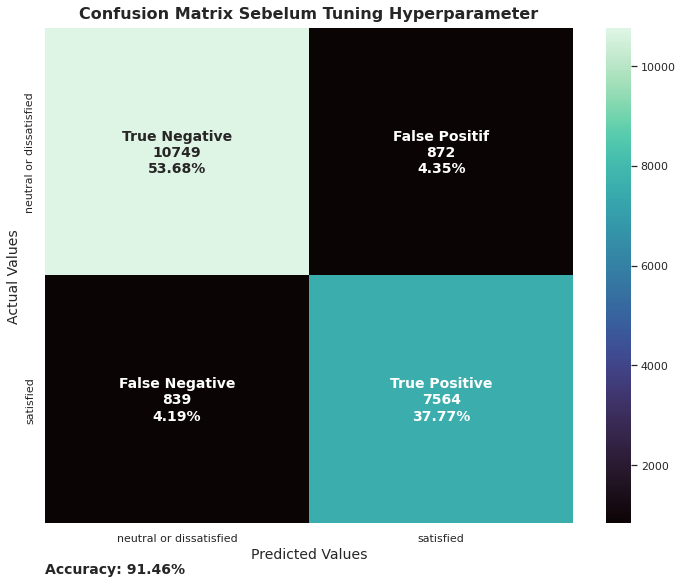

In [ ]:
fig, ax = plt.subplots(1,figsize=(10,8))
cf_matrix = confusion_matrix(dtc.predict(x_test),y_test)

group_names = ['True Negative','False Positif','False Negative','True Positive']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix,annot=labels,fmt='',annot_kws={'fontsize':14,'weight':'semibold'},cmap='mako')

ax.set_title('Confusion Matrix Sebelum Tuning Hyperparameter',pad=10,fontsize=16,fontweight='semibold')
ax.set_xlabel('Predicted Values',fontsize=14)
ax.set_ylabel('Actual Values',fontsize=14)
ax.xaxis.set_ticklabels(['neutral or dissatisfied','satisfied'])
ax.yaxis.set_ticklabels(['neutral or dissatisfied','satisfied'])
fig.text(x=0, y=-0.1, transform=ax.transAxes, s='Accuracy: {:,.2f}%'.format((((cf_matrix[0,0] + cf_matrix[1,1])/cf_matrix.sum())*100)),fontweight='demibold', fontsize=14)

fig.tight_layout()
plt.show()


* Sesudah tuning hyperparameter

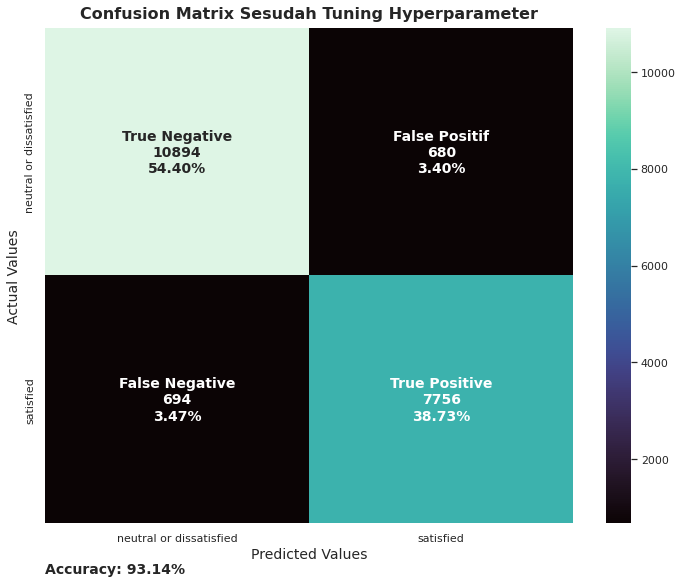

In [ ]:
fig, ax = plt.subplots(1,figsize=(10,8))
cf_matrix = confusion_matrix(tunedDtc.predict(x_test),y_test)

group_names = ['True Negative','False Positif','False Negative','True Positive']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix,annot=labels,fmt='',annot_kws={'fontsize':14,'weight':'semibold'},cmap='mako')

ax.set_title('Confusion Matrix Sesudah Tuning Hyperparameter',pad=10,fontsize=16,fontweight='semibold')
ax.set_xlabel('Predicted Values',fontsize=14)
ax.set_ylabel('Actual Values',fontsize=14)
ax.xaxis.set_ticklabels(['neutral or dissatisfied','satisfied'])
ax.yaxis.set_ticklabels(['neutral or dissatisfied','satisfied'])
fig.text(x=0, y=-0.1, transform=ax.transAxes, s='Accuracy: {:,.2f}%'.format((((cf_matrix[0,0] + cf_matrix[1,1])/cf_matrix.sum())*100)),fontweight='demibold', fontsize=14)

fig.tight_layout()
plt.show()

Setelah dilakukan hyperparameter tuning terdapat peningkatan akurasi sebesar 1.68%

##### K-Nearest Neighbor 

In [ ]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

###### Tuning Hyperparameter

In [ ]:
param_grid = {'n_neighbors': np.arange(1,16)}

In [ ]:
grid = GridSearchCV(KNeighborsClassifier(),param_grid,cv=StratifiedKFold(n_splits=5),return_train_score=True,verbose=2)
grid.fit(x_train,y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV] END ......................................n_neighbors=1; total time=  10.3s
[CV] END ......................................n_neighbors=1; total time=   9.1s
[CV] END ......................................n_neighbors=1; total time=   9.1s
[CV] END ......................................n_neighbors=1; total time=   9.2s
[CV] END ......................................n_neighbors=1; total time=   9.0s
[CV] END ......................................n_neighbors=2; total time=  11.0s
[CV] END ......................................n_neighbors=2; total time=  11.9s
[CV] END ......................................n_neighbors=2; total time=  12.0s
[CV] END ......................................n_neighbors=2; total time=  12.4s
[CV] END ......................................n_neighbors=2; total time=  11.7s
[CV] END ......................................n_neighbors=3; total time=  13.6s
[CV] END ......................................n

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])},
             return_train_score=True, verbose=2)

In [ ]:
results = pd.DataFrame(grid.cv_results_)
results = results[['params','mean_test_score','mean_train_score']].sort_values(['mean_test_score','mean_train_score'],ascending=False,ignore_index=True)
results

,params,mean_test_score,mean_train_score
0,{'n_neighbors': 9},0.894936,0.912375
1,{'n_neighbors': 11},0.894736,0.908944
2,{'n_neighbors': 13},0.894312,0.906373
3,{'n_neighbors': 7},0.894049,0.917285
4,{'n_neighbors': 15},0.893987,0.904219
5,{'n_neighbors': 5},0.893238,0.924639
6,{'n_neighbors': 14},0.892376,0.903526
7,{'n_neighbors': 10},0.892202,0.908401
8,{'n_neighbors': 12},0.892077,0.905383
9,{'n_neighbors': 8},0.891390,0.911491


In [ ]:
results.loc[0]['params']

{'n_neighbors': 9}

In [ ]:
tunedKnn = KNeighborsClassifier(n_neighbors=9)
tunedKnn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=9)

###### Report

* Sebelum tuning hyperparameter

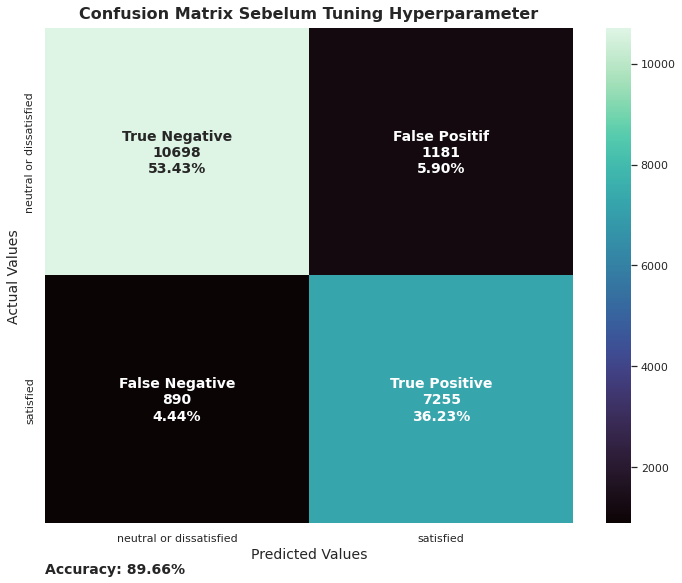

In [ ]:
fig, ax = plt.subplots(1,figsize=(10,8))
cf_matrix = confusion_matrix(knn.predict(x_test),y_test)

group_names = ['True Negative','False Positif','False Negative','True Positive']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix,annot=labels,fmt='',annot_kws={'fontsize':14,'weight':'semibold'},cmap='mako')

ax.set_title('Confusion Matrix Sebelum Tuning Hyperparameter',pad=10,fontsize=16,fontweight='semibold')
ax.set_xlabel('Predicted Values',fontsize=14)
ax.set_ylabel('Actual Values',fontsize=14)
ax.xaxis.set_ticklabels(['neutral or dissatisfied','satisfied'])
ax.yaxis.set_ticklabels(['neutral or dissatisfied','satisfied'])
fig.text(x=0, y=-0.1, transform=ax.transAxes, s='Accuracy: {:,.2f}%'.format((((cf_matrix[0,0] + cf_matrix[1,1])/cf_matrix.sum())*100)),fontweight='demibold', fontsize=14)

fig.tight_layout()
plt.show()

* Sesudah Tuning Hyperparameter

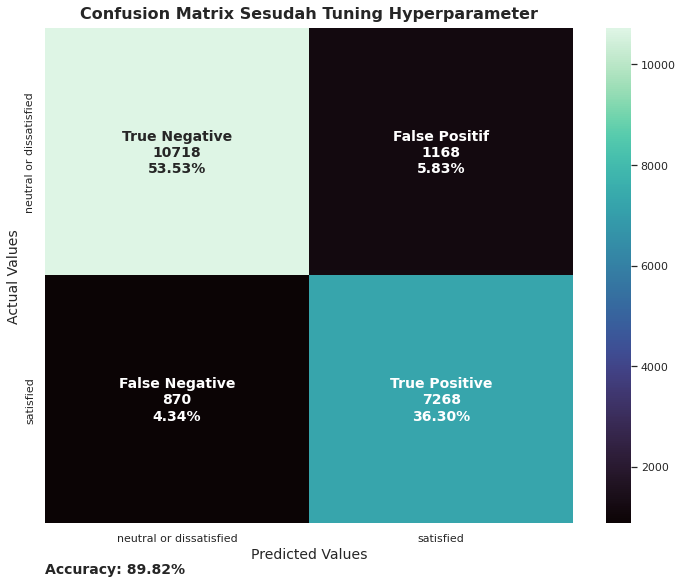

In [ ]:
fig, ax = plt.subplots(1,figsize=(10,8))
cf_matrix = confusion_matrix(tunedKnn.predict(x_test),y_test)

group_names = ['True Negative','False Positif','False Negative','True Positive']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix,annot=labels,fmt='',annot_kws={'fontsize':14,'weight':'semibold'},cmap='mako')

ax.set_title('Confusion Matrix Sesudah Tuning Hyperparameter',pad=10,fontsize=16,fontweight='semibold')
ax.set_xlabel('Predicted Values',fontsize=14)
ax.set_ylabel('Actual Values',fontsize=14)
ax.xaxis.set_ticklabels(['neutral or dissatisfied','satisfied'])
ax.yaxis.set_ticklabels(['neutral or dissatisfied','satisfied'])
fig.text(x=0, y=-0.1, transform=ax.transAxes, s='Accuracy: {:,.2f}%'.format((((cf_matrix[0,0] + cf_matrix[1,1])/cf_matrix.sum())*100)),fontweight='demibold', fontsize=14)

fig.tight_layout()
plt.show()

Setelah dilakukan hyperparameter tuning terdapat peningkatan akurasi sebesar 0.16%

#### Metode Undersampling

##### Pre-Processing

* Random Under Sampler

In [ ]:
rus = RandomUnderSampler(random_state=0)
x_undersampled, y_undersampled = rus.fit_resample(x_train,y_train)

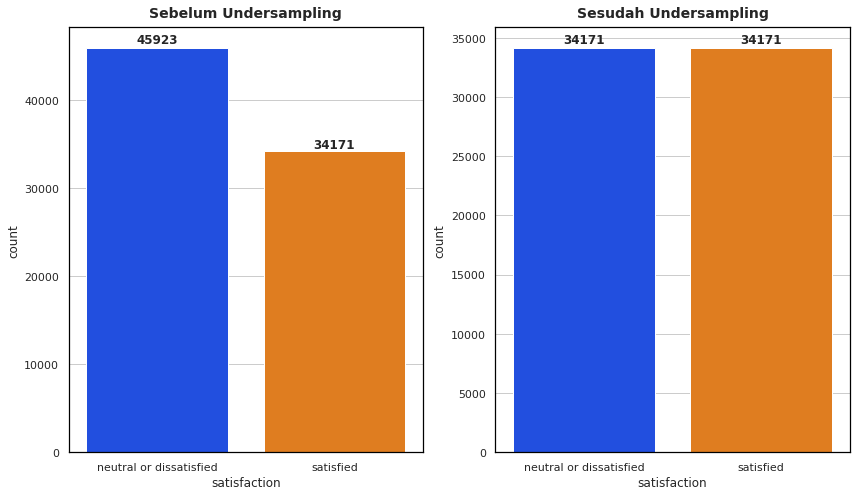

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(12,7))

sns.countplot(ax=ax[0],x=y_train,order = y_train.value_counts().index)
ax[0].set_title('Sebelum Undersampling',fontsize=14,weight='bold',pad=10)
for i, value in enumerate(y_train.value_counts()):
    ax[0].text(i,value*1.01,'{}'.format(value),fontsize=12,weight='semibold',ha='center')

sns.countplot(ax=ax[1],x=y_undersampled)
ax[1].set_title('Sesudah Undersampling',fontsize=14,weight='bold',pad=10)
for i, value in enumerate(y_undersampled.value_counts(sort=False)):
    ax[1].text(i,value*1.01,'{}'.format(value),fontsize=12,weight='semibold',ha='center')

fig.tight_layout()
plt.show()

##### Decision Tree

In [ ]:
dtc = DecisionTreeClassifier()
dtc = dtc.fit(x_undersampled,y_undersampled)

###### Tuning Hyperparameter

In [ ]:
dtc.tree_.max_depth

34

In [ ]:
param_grid = {'max_depth':np.arange(np.round(dtc.tree_.max_depth/4), np.round(dtc.tree_.max_depth/2)),'criterion':['gini','entropy'],'max_features':[None,'sqrt','log2']}

In [ ]:
grid = GridSearchCV(DecisionTreeClassifier(),param_grid,cv=StratifiedKFold(n_splits=5),return_train_score=True,verbose=2,scoring='accuracy')
grid.fit(x_undersampled,y_undersampled)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END ...criterion=gini, max_depth=8.0, max_features=None; total time=   0.3s
[CV] END ...criterion=gini, max_depth=8.0, max_features=None; total time=   0.2s
[CV] END ...criterion=gini, max_depth=8.0, max_features=None; total time=   0.2s
[CV] END ...criterion=gini, max_depth=8.0, max_features=None; total time=   0.2s
[CV] END ...criterion=gini, max_depth=8.0, max_features=None; total time=   0.2s
[CV] END ...criterion=gini, max_depth=8.0, max_features=sqrt; total time=   0.2s
[CV] END ...criterion=gini, max_depth=8.0, max_features=sqrt; total time=   0.2s
[CV] END ...criterion=gini, max_depth=8.0, max_features=sqrt; total time=   0.2s
[CV] END ...criterion=gini, max_depth=8.0, max_features=sqrt; total time=   0.2s
[CV] END ...criterion=gini, max_depth=8.0, max_features=sqrt; total time=   0.2s
[CV] END ...criterion=gini, max_depth=8.0, max_features=log2; total time=   0.2s
[CV] END ...criterion=gini, max_depth=8.0, max_

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 8.,  9., 10., 11., 12., 13., 14., 15., 16.]),
                         'max_features': [None, 'sqrt', 'log2']},
             return_train_score=True, scoring='accuracy', verbose=2)

In [ ]:
results = pd.DataFrame(grid.cv_results_)
results = results[['params','mean_test_score','mean_train_score']].sort_values(['mean_test_score','mean_train_score'],ascending=False,ignore_index=True)
results

,params,mean_test_score,mean_train_score
0,"{'criterion': 'entropy', 'max_depth': 13.0, 'm...",0.925580,0.942729
1,"{'criterion': 'entropy', 'max_depth': 12.0, 'm...",0.925317,0.937751
2,"{'criterion': 'gini', 'max_depth': 12.0, 'max_...",0.924936,0.940315
3,"{'criterion': 'gini', 'max_depth': 14.0, 'max_...",0.924307,0.951278
4,"{'criterion': 'entropy', 'max_depth': 15.0, 'm...",0.924219,0.952518
5,"{'criterion': 'gini', 'max_depth': 13.0, 'max_...",0.924219,0.945820
6,"{'criterion': 'entropy', 'max_depth': 14.0, 'm...",0.924205,0.947236
7,"{'criterion': 'entropy', 'max_depth': 11.0, 'm...",0.924117,0.932779
8,"{'criterion': 'gini', 'max_depth': 11.0, 'max_...",0.923546,0.934919
9,"{'criterion': 'entropy', 'max_depth': 16.0, 'm...",0.923195,0.957387


In [ ]:
results.loc[0]['params']

{'criterion': 'entropy', 'max_depth': 13.0, 'max_features': None}

In [ ]:
tunedDtc = DecisionTreeClassifier(criterion='entropy',max_depth=13,max_features=None)
tunedDtc.fit(x_undersampled,y_undersampled)

DecisionTreeClassifier(criterion='entropy', max_depth=13)

###### Report

* Sebelum tuning hyperparameter

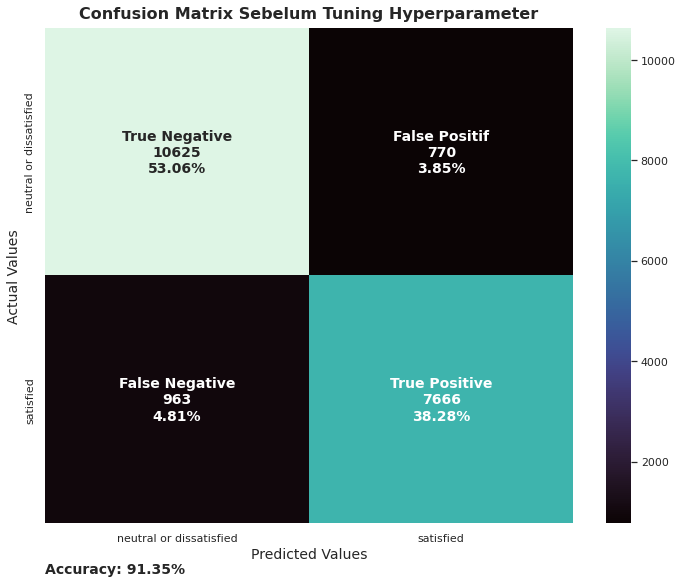

In [ ]:
fig, ax = plt.subplots(1,figsize=(10,8))
cf_matrix = confusion_matrix(dtc.predict(x_test),y_test)

group_names = ['True Negative','False Positif','False Negative','True Positive']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix,annot=labels,fmt='',annot_kws={'fontsize':14,'weight':'semibold'},cmap='mako')

ax.set_title('Confusion Matrix Sebelum Tuning Hyperparameter',pad=10,fontsize=16,fontweight='semibold')
ax.set_xlabel('Predicted Values',fontsize=14)
ax.set_ylabel('Actual Values',fontsize=14)
ax.xaxis.set_ticklabels(['neutral or dissatisfied','satisfied'])
ax.yaxis.set_ticklabels(['neutral or dissatisfied','satisfied'])
fig.text(x=0, y=-0.1, transform=ax.transAxes, s='Accuracy: {:,.2f}%'.format((((cf_matrix[0,0] + cf_matrix[1,1])/cf_matrix.sum())*100)),fontweight='demibold', fontsize=14)

fig.tight_layout()
plt.show()

* Sesudah tuning hyperparameter

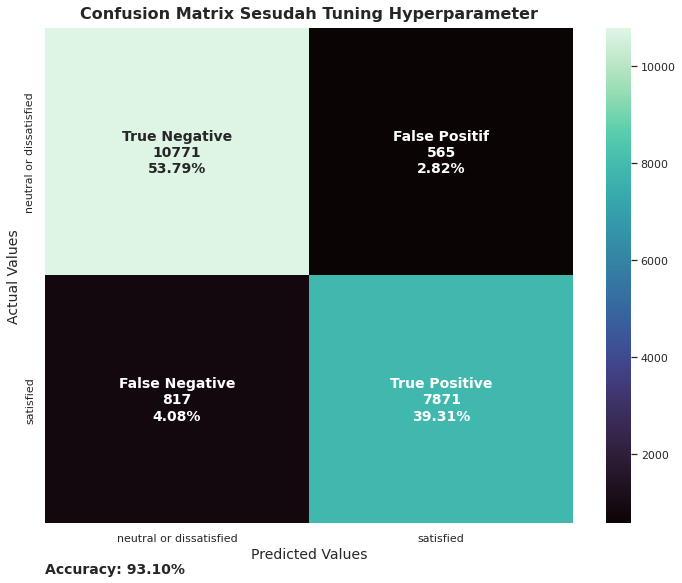

In [ ]:
fig, ax = plt.subplots(1,figsize=(10,8))
cf_matrix = confusion_matrix(tunedDtc.predict(x_test),y_test)

group_names = ['True Negative','False Positif','False Negative','True Positive']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix,annot=labels,fmt='',annot_kws={'fontsize':14,'weight':'semibold'},cmap='mako')

ax.set_title('Confusion Matrix Sesudah Tuning Hyperparameter',pad=10,fontsize=16,fontweight='semibold')
ax.set_xlabel('Predicted Values',fontsize=14)
ax.set_ylabel('Actual Values',fontsize=14)
ax.xaxis.set_ticklabels(['neutral or dissatisfied','satisfied'])
ax.yaxis.set_ticklabels(['neutral or dissatisfied','satisfied'])
fig.text(x=0, y=-0.1, transform=ax.transAxes, s='Accuracy: {:,.2f}%'.format((((cf_matrix[0,0] + cf_matrix[1,1])/cf_matrix.sum())*100)),fontweight='demibold', fontsize=14)

fig.tight_layout()
plt.show()

Setelah dilakukan hyperparameter tuning terdapat peningkatan akurasi sebesar 1.75%

##### K-Nearest Neighbor

In [ ]:
knn = KNeighborsClassifier()
knn.fit(x_undersampled,y_undersampled)

KNeighborsClassifier()

###### Tuning Hyperparameter

In [ ]:
param_grid = {'n_neighbors': np.arange(1,16)}

In [ ]:
grid = GridSearchCV(KNeighborsClassifier(),param_grid,cv=StratifiedKFold(n_splits=5),return_train_score=True,verbose=2)
grid.fit(x_undersampled,y_undersampled)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV] END ......................................n_neighbors=1; total time=   7.1s
[CV] END ......................................n_neighbors=1; total time=   7.0s
[CV] END ......................................n_neighbors=1; total time=   8.2s
[CV] END ......................................n_neighbors=1; total time=   7.4s
[CV] END ......................................n_neighbors=1; total time=   7.4s
[CV] END ......................................n_neighbors=2; total time=   8.4s
[CV] END ......................................n_neighbors=2; total time=   8.4s
[CV] END ......................................n_neighbors=2; total time=   8.9s
[CV] END ......................................n_neighbors=2; total time=   9.5s
[CV] END ......................................n_neighbors=2; total time=   8.8s
[CV] END ......................................n_neighbors=3; total time=   9.8s
[CV] END ......................................n

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])},
             return_train_score=True, verbose=2)

In [ ]:
results = pd.DataFrame(grid.cv_results_)
results = results[['params','mean_test_score','mean_train_score']].sort_values(['mean_test_score','mean_train_score'],ascending=False,ignore_index=True)
results

,params,mean_test_score,mean_train_score
0,{'n_neighbors': 11},0.892087,0.906741
1,{'n_neighbors': 13},0.891736,0.904422
2,{'n_neighbors': 15},0.891648,0.902421
3,{'n_neighbors': 9},0.891619,0.909876
4,{'n_neighbors': 7},0.891385,0.914972
5,{'n_neighbors': 5},0.890521,0.922690
6,{'n_neighbors': 14},0.889936,0.901912
7,{'n_neighbors': 12},0.889775,0.903442
8,{'n_neighbors': 10},0.889365,0.906079
9,{'n_neighbors': 8},0.888970,0.909251


In [ ]:
results.loc[0]['params']

{'n_neighbors': 11}

In [ ]:
tunedKnn = KNeighborsClassifier(n_neighbors=11)
tunedKnn.fit(x_undersampled,y_undersampled)

KNeighborsClassifier(n_neighbors=11)

###### Report

* Sebelum tuning hyperparameter

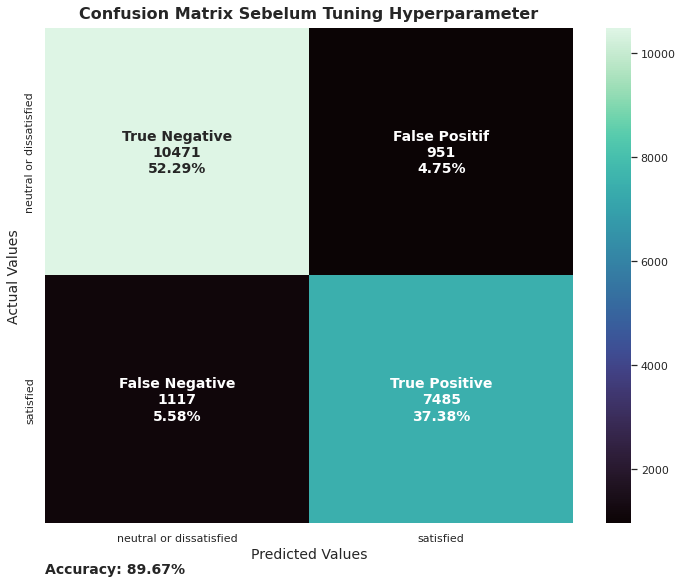

In [ ]:
fig, ax = plt.subplots(1,figsize=(10,8))
cf_matrix = confusion_matrix(knn.predict(x_test),y_test)

group_names = ['True Negative','False Positif','False Negative','True Positive']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix,annot=labels,fmt='',annot_kws={'fontsize':14,'weight':'semibold'},cmap='mako')

ax.set_title('Confusion Matrix Sebelum Tuning Hyperparameter',pad=10,fontsize=16,fontweight='semibold')
ax.set_xlabel('Predicted Values',fontsize=14)
ax.set_ylabel('Actual Values',fontsize=14)
ax.xaxis.set_ticklabels(['neutral or dissatisfied','satisfied'])
ax.yaxis.set_ticklabels(['neutral or dissatisfied','satisfied'])
fig.text(x=0, y=-0.1, transform=ax.transAxes, s='Accuracy: {:,.2f}%'.format((((cf_matrix[0,0] + cf_matrix[1,1])/cf_matrix.sum())*100)),fontweight='demibold', fontsize=14)

fig.tight_layout()
plt.show()

* Sesudah tuning hyperparameter

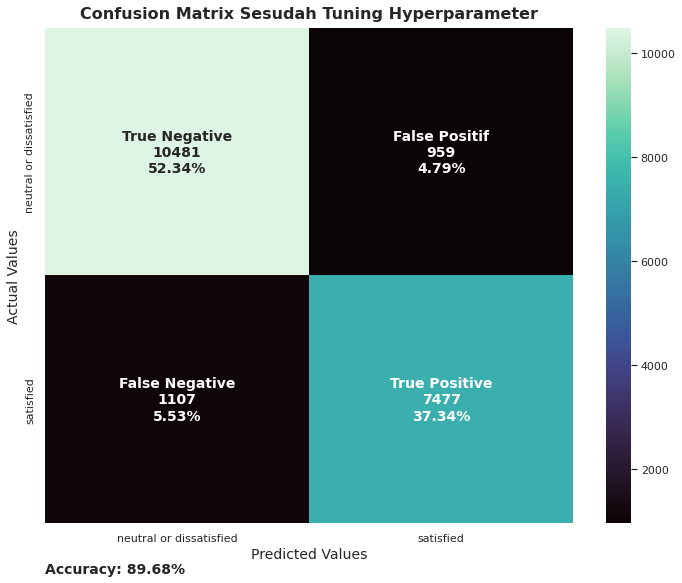

In [ ]:
fig, ax = plt.subplots(1,figsize=(10,8))
cf_matrix = confusion_matrix(tunedKnn.predict(x_test),y_test)

group_names = ['True Negative','False Positif','False Negative','True Positive']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix,annot=labels,fmt='',annot_kws={'fontsize':14,'weight':'semibold'},cmap='mako')

ax.set_title('Confusion Matrix Sesudah Tuning Hyperparameter',pad=10,fontsize=16,fontweight='semibold')
ax.set_xlabel('Predicted Values',fontsize=14)
ax.set_ylabel('Actual Values',fontsize=14)
ax.xaxis.set_ticklabels(['neutral or dissatisfied','satisfied'])
ax.yaxis.set_ticklabels(['neutral or dissatisfied','satisfied'])
fig.text(x=0, y=-0.1, transform=ax.transAxes, s='Accuracy: {:,.2f}%'.format((((cf_matrix[0,0] + cf_matrix[1,1])/cf_matrix.sum())*100)),fontweight='demibold', fontsize=14)

fig.tight_layout()
plt.show()

Setelah dilakukan hyperparameter tuning terdapat peningkatan akurasi sebesar 0.01%

#### Metode Oversampling

##### Pre-Processing

* SMOTE (Synthetic Minority Oversampling Technique)

In [ ]:
smote = SMOTE(k_neighbors=9,random_state=0)
x_oversampled, y_oversampled = smote.fit_resample(x_train,y_train)

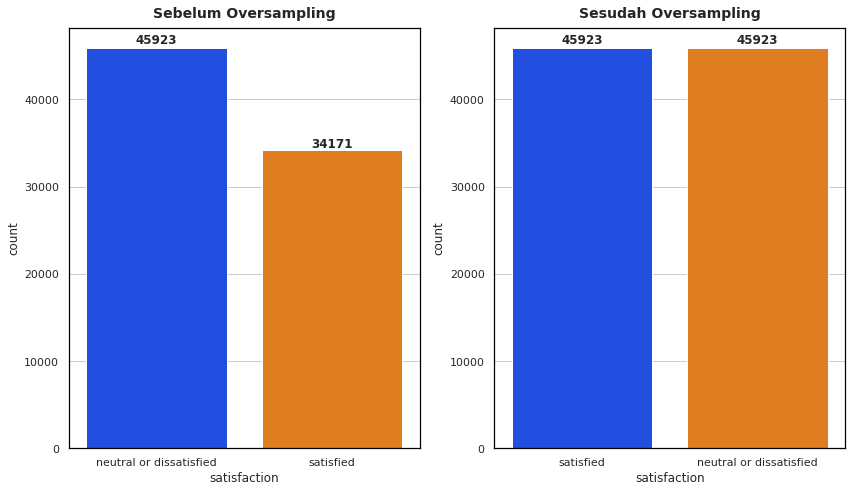

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(12,7))

sns.countplot(ax=ax[0],x=y_train,order = y_train.value_counts().index)
ax[0].set_title('Sebelum Oversampling',fontsize=14,weight='bold',pad=10)
for i, value in enumerate(y_train.value_counts()):
    ax[0].text(i,value*1.01,'{}'.format(value),fontsize=12,weight='semibold',ha='center')

sns.countplot(ax=ax[1],x=y_oversampled)
ax[1].set_title('Sesudah Oversampling',fontsize=14,weight='bold',pad=10)
for i, value in enumerate(y_oversampled.value_counts(sort=False)):
    ax[1].text(i,value*1.01,'{}'.format(value),fontsize=12,weight='semibold',ha='center')

fig.tight_layout()
plt.show()

##### Decision Tree

In [ ]:
dtc = DecisionTreeClassifier()
dtc = dtc.fit(x_oversampled,y_oversampled)

###### Tuning Hyperparameter

In [ ]:
dtc.tree_.max_depth

38

In [ ]:
param_grid = {'max_depth':np.arange(np.round(dtc.tree_.max_depth/4), np.round(dtc.tree_.max_depth/2)),'criterion':['gini','entropy'],'max_features':[None,'sqrt','log2']}

In [ ]:
grid = GridSearchCV(DecisionTreeClassifier(),param_grid,cv=StratifiedKFold(n_splits=5),return_train_score=True,verbose=2,scoring='accuracy')
grid.fit(x_oversampled,y_oversampled)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END ..criterion=gini, max_depth=10.0, max_features=None; total time=   0.4s
[CV] END ..criterion=gini, max_depth=10.0, max_features=None; total time=   0.5s
[CV] END ..criterion=gini, max_depth=10.0, max_features=None; total time=   0.4s
[CV] END ..criterion=gini, max_depth=10.0, max_features=None; total time=   0.4s
[CV] END ..criterion=gini, max_depth=10.0, max_features=None; total time=   0.4s
[CV] END ..criterion=gini, max_depth=10.0, max_features=sqrt; total time=   0.3s
[CV] END ..criterion=gini, max_depth=10.0, max_features=sqrt; total time=   0.3s
[CV] END ..criterion=gini, max_depth=10.0, max_features=sqrt; total time=   0.2s
[CV] END ..criterion=gini, max_depth=10.0, max_features=sqrt; total time=   0.3s
[CV] END ..criterion=gini, max_depth=10.0, max_features=sqrt; total time=   0.2s
[CV] END ..criterion=gini, max_depth=10.0, max_features=log2; total time=   0.2s
[CV] END ..criterion=gini, max_depth=10.0, max_

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([10., 11., 12., 13., 14., 15., 16., 17., 18.]),
                         'max_features': [None, 'sqrt', 'log2']},
             return_train_score=True, scoring='accuracy', verbose=2)

In [ ]:
results = pd.DataFrame(grid.cv_results_)
results = results[['params','mean_test_score','mean_train_score']].sort_values(['mean_test_score','mean_train_score'],ascending=False,ignore_index=True)
results

,params,mean_test_score,mean_train_score
0,"{'criterion': 'entropy', 'max_depth': 15.0, 'm...",0.932289,0.953289
1,"{'criterion': 'entropy', 'max_depth': 14.0, 'm...",0.932180,0.949015
2,"{'criterion': 'entropy', 'max_depth': 16.0, 'm...",0.932115,0.957799
3,"{'criterion': 'gini', 'max_depth': 14.0, 'max_...",0.931886,0.951857
4,"{'criterion': 'gini', 'max_depth': 15.0, 'max_...",0.931832,0.956468
5,"{'criterion': 'gini', 'max_depth': 13.0, 'max_...",0.931472,0.947420
6,"{'criterion': 'entropy', 'max_depth': 13.0, 'm...",0.931113,0.945066
7,"{'criterion': 'gini', 'max_depth': 12.0, 'max_...",0.931059,0.942978
8,"{'criterion': 'entropy', 'max_depth': 17.0, 'm...",0.931059,0.961890
9,"{'criterion': 'gini', 'max_depth': 16.0, 'max_...",0.930579,0.961582


In [ ]:
results.loc[0]['params']

{'criterion': 'entropy', 'max_depth': 15.0, 'max_features': None}

In [ ]:
tunedDtc = DecisionTreeClassifier(criterion='entropy',max_depth=15,max_features=None)
tunedDtc.fit(x_oversampled,y_oversampled)

DecisionTreeClassifier(criterion='entropy', max_depth=15)

###### Report

* Sebelum tuning hyperparameter

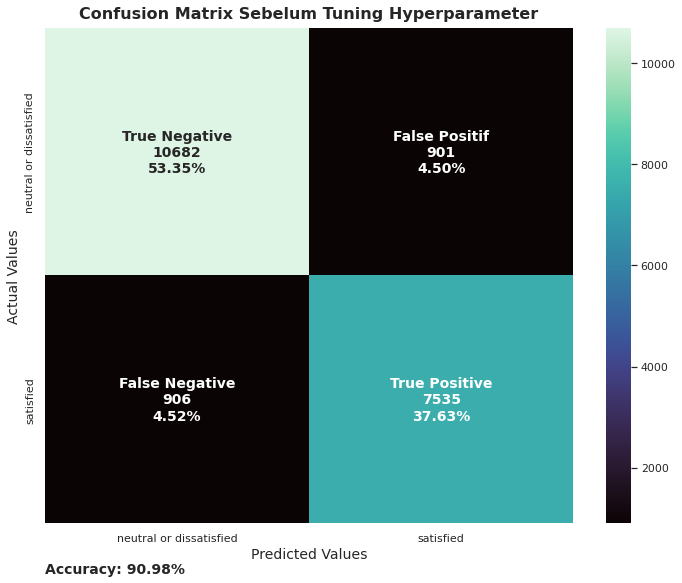

In [ ]:
fig, ax = plt.subplots(1,figsize=(10,8))
cf_matrix = confusion_matrix(dtc.predict(x_test),y_test)

group_names = ['True Negative','False Positif','False Negative','True Positive']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix,annot=labels,fmt='',annot_kws={'fontsize':14,'weight':'semibold'},cmap='mako')

ax.set_title('Confusion Matrix Sebelum Tuning Hyperparameter',pad=10,fontsize=16,fontweight='semibold')
ax.set_xlabel('Predicted Values',fontsize=14)
ax.set_ylabel('Actual Values',fontsize=14)
ax.xaxis.set_ticklabels(['neutral or dissatisfied','satisfied'])
ax.yaxis.set_ticklabels(['neutral or dissatisfied','satisfied'])
fig.text(x=0, y=-0.1, transform=ax.transAxes, s='Accuracy: {:,.2f}%'.format((((cf_matrix[0,0] + cf_matrix[1,1])/cf_matrix.sum())*100)),fontweight='demibold', fontsize=14)

fig.tight_layout()
plt.show()

* Sesudah tuning hyperparameter

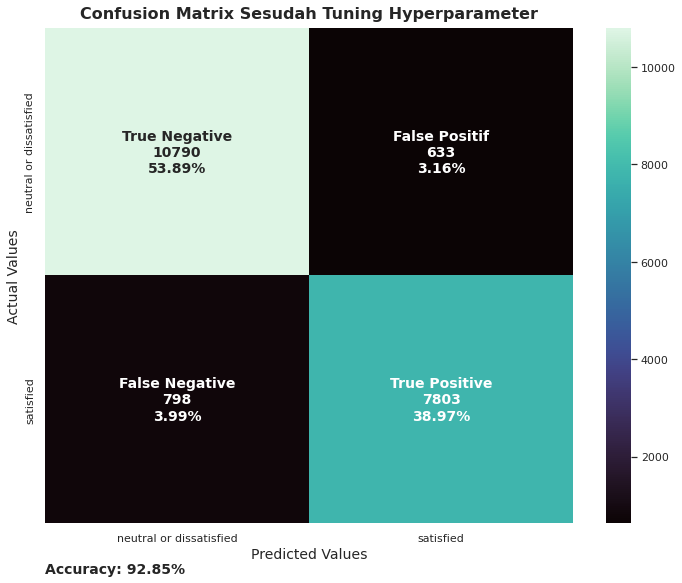

In [ ]:
fig, ax = plt.subplots(1,figsize=(10,8))
cf_matrix = confusion_matrix(tunedDtc.predict(x_test),y_test)

group_names = ['True Negative','False Positif','False Negative','True Positive']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix,annot=labels,fmt='',annot_kws={'fontsize':14,'weight':'semibold'},cmap='mako')

ax.set_title('Confusion Matrix Sesudah Tuning Hyperparameter',pad=10,fontsize=16,fontweight='semibold')
ax.set_xlabel('Predicted Values',fontsize=14)
ax.set_ylabel('Actual Values',fontsize=14)
ax.xaxis.set_ticklabels(['neutral or dissatisfied','satisfied'])
ax.yaxis.set_ticklabels(['neutral or dissatisfied','satisfied'])
fig.text(x=0, y=-0.1, transform=ax.transAxes, s='Accuracy: {:,.2f}%'.format((((cf_matrix[0,0] + cf_matrix[1,1])/cf_matrix.sum())*100)),fontweight='demibold', fontsize=14)

fig.tight_layout()
plt.show()

Setelah dilakukan hyperparameter tuning terdapat peningkatan akurasi sebesar 1.85%

##### K-Nears Neighbor

In [ ]:
knn = KNeighborsClassifier()
knn.fit(x_oversampled,y_oversampled)

KNeighborsClassifier()

###### Tuning Hyperparameter

In [ ]:
param_grid = {'n_neighbors': np.arange(1,16)}

In [ ]:
grid = GridSearchCV(KNeighborsClassifier(),param_grid,cv=StratifiedKFold(n_splits=5),return_train_score=True,verbose=2,scoring='accuracy')
grid.fit(x_oversampled,y_oversampled)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV] END ......................................n_neighbors=1; total time=  13.4s
[CV] END ......................................n_neighbors=1; total time=  13.0s
[CV] END ......................................n_neighbors=1; total time=  13.0s
[CV] END ......................................n_neighbors=1; total time=  13.0s
[CV] END ......................................n_neighbors=1; total time=  13.1s
[CV] END ......................................n_neighbors=2; total time=  15.6s
[CV] END ......................................n_neighbors=2; total time=  15.5s
[CV] END ......................................n_neighbors=2; total time=  15.4s
[CV] END ......................................n_neighbors=2; total time=  15.4s
[CV] END ......................................n_neighbors=2; total time=  19.5s
[CV] END ......................................n_neighbors=3; total time=  18.2s
[CV] END ......................................n

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])},
             return_train_score=True, scoring='accuracy', verbose=2)

In [ ]:
results = pd.DataFrame(grid.cv_results_)
results = results[['params','mean_test_score','mean_train_score']].sort_values(['mean_test_score','mean_train_score'],ascending=False,ignore_index=True)
results

,params,mean_test_score,mean_train_score
0,{'n_neighbors': 1},0.907312,0.999001
1,{'n_neighbors': 3},0.903915,0.949753
2,{'n_neighbors': 5},0.903915,0.933416
3,{'n_neighbors': 7},0.902696,0.925127
4,{'n_neighbors': 9},0.902456,0.919713
5,{'n_neighbors': 11},0.901444,0.915399
6,{'n_neighbors': 8},0.901182,0.920331
7,{'n_neighbors': 6},0.901063,0.927030
8,{'n_neighbors': 10},0.900126,0.916273
9,{'n_neighbors': 13},0.900061,0.912204


In [ ]:
results.loc[0]['params']

{'n_neighbors': 1}

In [ ]:
tunedKnn = KNeighborsClassifier(n_neighbors=1)
tunedKnn.fit(x_oversampled,y_oversampled)

KNeighborsClassifier(n_neighbors=1)

###### Report

* Sebelum tuning hyperparameter

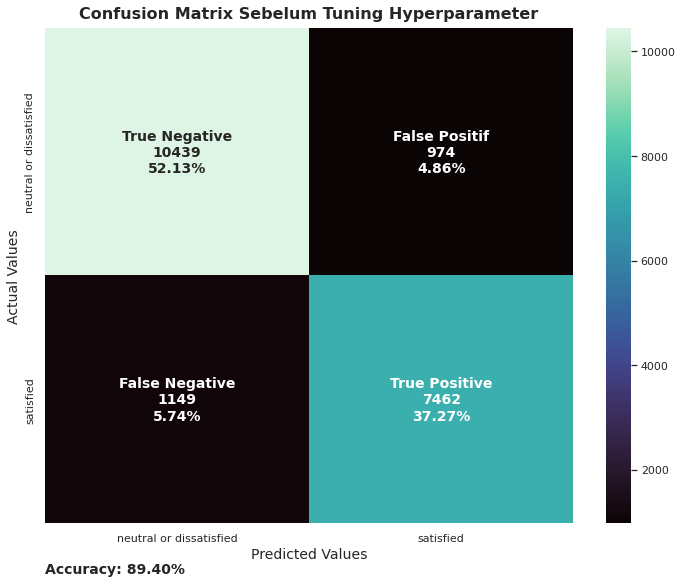

In [ ]:
fig, ax = plt.subplots(1,figsize=(10,8))
cf_matrix = confusion_matrix(knn.predict(x_test),y_test)

group_names = ['True Negative','False Positif','False Negative','True Positive']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix,annot=labels,fmt='',annot_kws={'fontsize':14,'weight':'semibold'},cmap='mako')

ax.set_title('Confusion Matrix Sebelum Tuning Hyperparameter',pad=10,fontsize=16,fontweight='semibold')
ax.set_xlabel('Predicted Values',fontsize=14)
ax.set_ylabel('Actual Values',fontsize=14)
ax.xaxis.set_ticklabels(['neutral or dissatisfied','satisfied'])
ax.yaxis.set_ticklabels(['neutral or dissatisfied','satisfied'])
fig.text(x=0, y=-0.1, transform=ax.transAxes, s='Accuracy: {:,.2f}%'.format((((cf_matrix[0,0] + cf_matrix[1,1])/cf_matrix.sum())*100)),fontweight='demibold', fontsize=14)

fig.tight_layout()
plt.show()

* Sesudah tuning hyperparameter

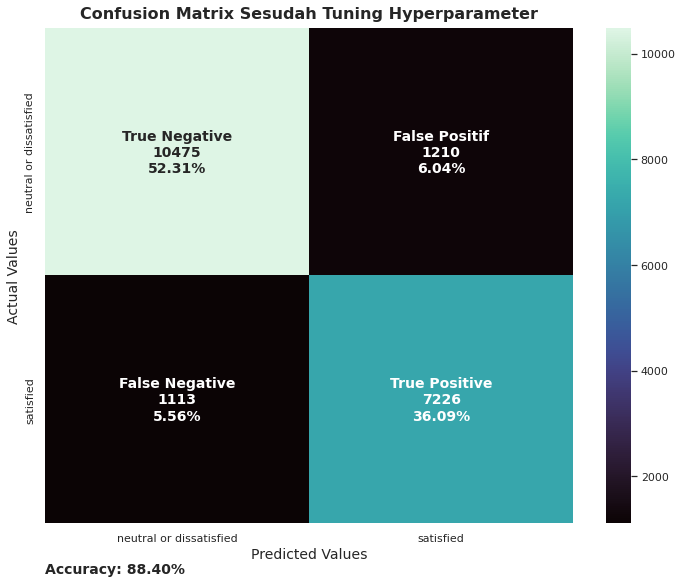

In [ ]:
fig, ax = plt.subplots(1,figsize=(10,8))
cf_matrix = confusion_matrix(tunedKnn.predict(x_test),y_test)

group_names = ['True Negative','False Positif','False Negative','True Positive']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix,annot=labels,fmt='',annot_kws={'fontsize':14,'weight':'semibold'},cmap='mako')

ax.set_title('Confusion Matrix Sesudah Tuning Hyperparameter',pad=10,fontsize=16,fontweight='semibold')
ax.set_xlabel('Predicted Values',fontsize=14)
ax.set_ylabel('Actual Values',fontsize=14)
ax.xaxis.set_ticklabels(['neutral or dissatisfied','satisfied'])
ax.yaxis.set_ticklabels(['neutral or dissatisfied','satisfied'])
fig.text(x=0, y=-0.1, transform=ax.transAxes, s='Accuracy: {:,.2f}%'.format((((cf_matrix[0,0] + cf_matrix[1,1])/cf_matrix.sum())*100)),fontweight='demibold', fontsize=14)

fig.tight_layout()
plt.show()

Setelah dilakukan hyperparameter tuning terdapat penurunan akurasi sebesar 1%

# Results

:Metode Tanpa Resampling:

*   Decision Tree mendapatkan akurasi sebesar 93,18% dengan parameter 
        DecisionTreeClassifier(criterion='gini', max_depth=14, max_features=None)
*   K-Nearst Neighbor mendapatkan akurasi sebesar 89,82% dengan parameter
        KNeighborsClassifier(n_neighbors=9)

Metode Undersampling:

*   Decision Tree mendapatkan akurasi sebesar 93,10% dengan parameter 
        DecisionTreeClassifier(criterion='entropy', max_depth=13, max_features=None)
*   K-Nearst Neighbor mendapatkan akurasi sebesar 89,69% dengan parameter
        KNeighborsClassifier(n_neighbors=11)

Metode Oversampling:

*   Decision Tree mendapatkan akurasi sebesar 92,85% dengan parameter 
        DecisionTreeClassifier(criterion='entropy', max_depth=15, max_features=None)
*   K-Nearst Neighbor mendapatkan akurasi sebesar 88,40% dengan parameter
        KNeighborsClassifier(n_neighbors=1)

# Kesimpulan

1. Dari ketiga metode tanpa resampling, undersampling, dan oversampling dengan dilakukan tuning hyperparameter didapatkan hasil yang terbaik adalah Decision Tree tanpa resampling dengan akurasi 93,2%, kedua adalah Decision Tree undersampling dengan akurasi 93,1%, ketiga adalah Decision Tree oversampling dengan akurasi 93%, dan terakhir K-Nearst Neighbor tanpa resampling, undersampling, serta oversampling dengan akurasi 89-88%.

2. Berdasarkan kompleksitas waku tercepat diantara kedua model algoritma tersebut adalah Decision Tree.

3. Berdasarkan Decision Tree tanpa resampling urutan fitur yang perlu diperhatikan jika ingin meningkatkan kepuasan pelanggan sebagai berikut

In [ ]:
#@title
feature_importance = pd.DataFrame(tunedDtc.feature_importances_)
feature_importance['label'] = x_train.columns
feature_importance.sort_values(by=0,ascending=False).head(10).reset_index(drop=True)

,0,label
0,0.342813,Hotel wifi service
1,0.286417,Group bookings
2,0.134389,Common Room entertainment
3,0.049493,Personal Travel
4,0.039887,Stay comfort
5,0.030905,Age
6,0.022963,Other service
7,0.021736,Departure/Arrival convenience
8,0.020492,Cleanliness
9,0.019444,Checkin/Checkout service
